In [22]:
k = 4

In [23]:
import os
from tqdm import tqdm

import pandas as pd
import numpy as np

def generate_combinations(alphabet, k):
    if k == 0: return ['']
        
    combinations = []
    for char in alphabet:
        for suffix in generate_combinations(alphabet, k - 1):
            combinations.append(char + suffix)
    
    return combinations

In [24]:
set_kmer = generate_combinations(alphabet=['A', 'C', 'G', 'T'], k=k)
set_type = {kmer: np.float16 for kmer in set_kmer}

In [25]:
dfData = pd.read_csv(f'data/DATA_ITS_species_{k}mer.csv', dtype=set_type)

In [26]:
dfData.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66460 entries, 0 to 66459
Columns: 258 entries, Genus to TTTT
dtypes: float16(256), object(2)
memory usage: 41.7 MB


In [29]:
dfData

,Genus,Species,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
0,Abortiporus,Abortiporus_biennis,-0.288086,-0.746094,0.627930,1.543945,0.170044,-0.288086,0.627930,0.170044,...,-0.746094,1.085938,1.543945,1.085938,1.085938,0.627930,4.750000,1.085938,0.627930,3.835938
1,Abortiporus,Abortiporus_biennis,-0.732910,-0.732910,0.219482,2.123047,-0.256592,-0.732910,0.695312,0.695312,...,-0.732910,1.171875,1.647461,1.171875,1.171875,0.695312,4.503906,0.695312,1.171875,3.076172
2,Abortiporus,Abortiporus_biennis,-0.758301,-0.758301,0.155151,1.982422,-0.301514,-0.758301,0.611816,0.611816,...,-0.758301,1.068359,1.525391,1.068359,1.068359,0.611816,4.722656,0.611816,1.068359,3.351562
3,Abortiporus,Abortiporus_biennis,-0.291016,-0.745117,0.163208,1.980469,-0.291016,-0.745117,0.617188,0.617188,...,-0.745117,1.071289,1.525391,1.071289,1.071289,0.617188,4.707031,0.617188,1.071289,3.796875
4,Abortiporus,Abortiporus_biennis,0.208130,-0.743164,0.208130,1.635742,0.208130,-0.267578,0.684082,0.208130,...,-0.743164,1.159180,1.159180,1.159180,1.159180,1.159180,4.488281,1.159180,0.684082,3.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66455,Zyzygomyces,Zyzygomyces_bachmannii,3.121094,2.021484,-1.271484,2.021484,0.924316,-0.173706,0.375244,1.473633,...,-1.271484,-0.173706,1.473633,1.473633,1.473633,-0.722656,0.375244,-0.722656,1.473633,-0.173706
66456,Zyzygomyces,Zyzygomyces_bachmannii,3.121094,2.021484,-1.271484,2.021484,0.924316,-0.173706,0.375244,1.473633,...,-1.271484,-0.173706,1.473633,1.473633,1.473633,-0.722656,0.375244,-0.722656,1.473633,-0.173706
66457,Zyzygomyces,Zyzygomyces_bachmannii,3.091797,2.003906,-1.259766,2.003906,0.915527,-0.172119,0.371826,1.459961,...,-1.259766,-0.172119,1.459961,1.459961,1.459961,-0.715820,-0.172119,-0.715820,1.459961,-0.172119
66458,Zyzygomyces,Zyzygomyces_bachmannii,3.142578,2.037109,-1.281250,2.037109,0.930664,-0.174927,0.377930,2.037109,...,-1.281250,-0.174927,1.483398,1.483398,1.483398,-0.728027,0.377930,-0.728027,1.483398,0.930664


In [30]:
print('# genus  : ', len(dfData['Genus'].unique()))
print('# species: ', len(dfData['Species'].unique()))
print('# samples: ', dfData.shape[0])

# genus  :  997
# species:  3323
# samples:  66460


In [31]:
with open('data/species_common.txt', 'r') as f:
    common_species = [species.strip().replace(' ', '_') for species in f.readlines()]

In [32]:
dfData = dfData[dfData['Species'].isin(common_species)]

In [33]:
import torch

print("PyTorch 버전:", torch.__version__)
print("CUDA 사용 가능 여부:", torch.cuda.is_available())

PyTorch 버전: 2.1.0
CUDA 사용 가능 여부: True


In [34]:
X = dfData.iloc[:, 2:].values
input_size = X.shape[1]

In [35]:
X.shape

(700, 256)

In [117]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y = dfData['Species']
y_encoded = label_encoder.fit_transform(y)
num_classes = max(y_encoded) + 1
ansLabel = label_encoder.classes_

/disk1/01.Myeongkyu/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/disk1/01.Myeongkyu/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [37]:
import torch.nn as nn
import torch.optim as optim

In [38]:
def conv1x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    return nn.Conv1d(in_planes, out_planes, kernel_size=3, stride=stride, padding=dilation,
                     groups=groups, bias=False, dilation=dilation)


class MyBlock1D(nn.Module):
    def __init__(self, in_planes, planes, stride=1, downsample=None,
                groups=1, dilation=1, norm_layer=None):
        super(MyBlock1D, self).__init__()

        if norm_layer is None:
            norm_layer = nn.BatchNorm1d
        
        self.conv1 = conv1x3(in_planes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.conv2 = conv1x3(planes, planes)
        self.bn2 = norm_layer(planes)
        
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        
    def forward(self, x):
        if self.downsample is not None:
            residual = self.downsample(x)
        else: residual = x
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)

        x += residual
        x = self.relu(x)
        
        return x

class MyResNet(nn.Module):
    def __init__(self, c1, c2, c3, c4, c5, kernel1,
                 block, layers, num_classes, zero_init_residual=False, norm_layer=None):
        super(MyResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm1d
        self._norm_layer = norm_layer

        self.inplanes = c1
        self.dilation = 1
        self.groups = 1
        
        self.conv1 = nn.Conv1d(1, self.inplanes, kernel_size=kernel1, stride=2, padding=3)
        self.bn1 = norm_layer(c1)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(block, c2, layers[0])
        self.layer2 = self._make_layer(block, c3, layers[1], stride=2, dilate=False)
        self.layer3 = self._make_layer(block, c4, layers[2], stride=2, dilate=False)
        self.layer4 = self._make_layer(block, c5, layers[3], stride=2, dilate=False)
        
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(c5, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, MyBlock1D):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        downsample = None

        if stride != 1 or self.inplanes != planes:
            downsample = nn.Sequential(
                nn.Conv1d(self.inplanes, planes, kernel_size=1, stride=stride),
                norm_layer(planes),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups, self.dilation, norm_layer))
        self.inplanes = planes

        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups, dilation=self.dilation, norm_layer=norm_layer))

        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        
        return x

In [39]:
from torch.utils.data import DataLoader, TensorDataset

In [40]:
X_tensor = torch.from_numpy(X).float().unsqueeze(1)
y_tensor = torch.from_numpy(y_encoded).long()

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
num_samples = X.shape[0]

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

n_folds = 10
kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

In [43]:
import time

In [44]:
import copy

from sklearn.metrics import accuracy_score
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_iter = 0
best_acc = 0

train_acc_list = []
val_acc_list = []
test_acc_list = []
time_list = []

# **** hyperparameters ****
c1 = 32
c2 = 64
c3 = 256
c4 = 512
c5 = 1024
kernel1 = 7
# *************************

name = f'species_RESNET18_common_{k}mer_{c1},{c2},{c3},{kernel1}'
directory = 'new_results/' + name

for train_index, test_index in kf.split(X_tensor, y_tensor):
    fold_test_answer_list = []
    n_iter += 1
    
    X_temp, X_test = X_tensor[train_index], X_tensor[test_index]
    y_temp, y_test = y_tensor[train_index], y_tensor[test_index]

    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1)
    
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)
    test_dataset = TensorDataset(X_test, y_test)
    
    batch_size = 1024
    train_DL = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_DL = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
    test_DL = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

    DL_dict = {'train': train_DL, 'val': val_DL}
    
    model = MyResNet(c1, c2, c3, c4, c5, kernel1,
                    MyBlock1D, [2,2,2,2], num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    model.to(device)

    num_epochs = 100

    epoch_train_acc_list = []
    epoch_val_acc_list = []
    epoch_test_acc_list = []
    epoch_time_list = []
    
    for epoch in tqdm(range(num_epochs)):
        fold_test_answer_list.append(f'----- Epoch {epoch+1} -----\n')
        epoch_test_answer_list = []
        time_st = time.time()
        
        for phase in ['train', 'val']:
            if phase == 'train': model.train()
            else: model.eval()
            epoch_corrects = 0
            
            for inputs, labels in DL_dict[phase]:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
    
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
    
                    epoch_corrects += torch.sum(preds == labels.data)
                    
            epoch_acc = epoch_corrects.double() / len(DL_dict[phase].dataset)
            if phase == 'train': epoch_train_acc_list.append(str(epoch_acc.item()))
            else: epoch_val_acc_list.append(str(epoch_acc.item()))

        model.eval()
        test_corrects = 0
        with torch.no_grad():
            for inputs, labels in test_DL:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                test_corrects += torch.sum(preds == labels.data)

                preds_list = preds.tolist()
                label_list = labels.tolist()
                for i in range(len(preds_list)):
                    epoch_test_answer_list.append(f'{label_list[i]},{preds_list[i]}')
                    
            test_acc = test_corrects.double() / len(test_DL.dataset)
            # print(f'Fold {n_iter} test Acc: {test_acc:.6f}, {time.time() - time_st} s') 
                
        epoch_test_acc_list.append(str(test_acc.item()))
        epoch_time_list.append(str(time.time() - time_st))
        fold_test_answer_list.append('\n'.join(epoch_test_answer_list))
        fold_test_answer_list.append('\n')

    train_acc_list.append(','.join(epoch_train_acc_list) + '\n')
    val_acc_list.append(','.join(epoch_val_acc_list) + '\n')
    test_acc_list.append(','.join(epoch_test_acc_list) + '\n')
    
    time_list.append(','.join(epoch_time_list) + '\n')

    if not os.path.isdir(directory):
        os.mkdir(directory)

    with open(directory + f'/Fold_{n_iter:02}.csv', 'w') as f:
        f.write(''.join(fold_test_answer_list))
    

with open(directory + '/train_acc.csv', 'w') as f:
    f.write(''.join(train_acc_list))

with open(directory + '/val_acc.csv', 'w') as f:
    f.write(''.join(val_acc_list))

with open(directory + '/test_acc.csv', 'w') as f:
    f.write(''.join(test_acc_list))

with open(directory + '/times.csv', 'w') as f:
    f.write(','.join(time_list))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 44.83it/s]


In [25]:
print(f'{epoch_acc:.4f}')

0.7665


In [45]:
from collections import Counter
from itertools import product

def count_kmers(sequence, k, possible_kmers):
    kmer_counts = Counter(sequence[i:i+k] for i in range(len(sequence) - k + 1))
    return np.array([kmer_counts.get(kmer, 0) for kmer in possible_kmers], dtype=np.int16)

k = 4
possible_kmers = [''.join(kmer) for kmer in product('ACGT', repeat=k)]

def gaussian_normalize(lst):
    mean = np.mean(lst)
    std = np.std(lst)
    normalized_lst = np.array([(x - mean) / std for x in lst], dtype=np.float32)
    return normalized_lst

In [99]:
seq = """ATGAACGCTGTTCTGAAAGTATGCAGTCTGAGTTGATTATCGTAATCAGTTAAAACTTTC
AACAACGGATCTCTTGGTTCCGGCATCGATGAAGAACGCAGCGAAATGCGATAAGTAATG
TGAATTGCAGAATTCAGTGAATCATCGAGTCTTTGAACGCACATTGCGCCCCCTGGTATT
CCGGGGGGCATGCCTGTCCGAGCGTCATTGCTGCCCTCAAGCACGGCTTGTGTGTTGGGC
CCCCGTCCCCCTCTCCCGGGGGACGGGCCCGAAAGGCAGCGGCGGCACCGCGTCCGGTCC
TCGAGCGTATGGGGCTTTGTCACCTGCTCTGTAGGCCCGGCCGGCGCCAGCCGACACCCA
ACTTTATTTTTCTAAGGTTGACCTCGGATCAGGTAGGGATACCCGCTGAACTTAAGCATA
TCAATAAGcggaggaaaagaaaccaACAGGGATTGCCTCAGTAACGGCGAGTGAAGCGGC
AAGAGCTCAAATTTGAAAGCTGGCCCCTTCGGGGTCCGCGTTGTAATTTGCAGAGGATGC
TTCGGGTGCAGCCCCCGTCTAAGTGCCCTGGAACGGGCCGTCATAGAGGGTGAGAATCCC
GTCTGGGACGGGGTGTCTGCGTCCGTGTGAAGCTCCTTCGACGAGTCGAGTTGTTTGGGA
ATGCAGCTCTAAATGGGTGGTAAATTTCATCTAAAGCTAAATACTGGCCGGAGACCGATA
GCGCACAAGTAGAGTGATCGAAAGATGAAAAGCACTTTGAAAAGAGAGTTAAACAGCACG
TGAAATTGTTGAAAGGGAAGCGTTTGCGACCAGACTCGCCCGCGGGGTTCAGCCGGCATT
CGTGCCGGTGTACTTCCCCGTGGGCGGGCCAGCGTCGGTTTGGGCGGCCGGTCAAAGGCC
CTCGGAATGTATCACCTCTCGGGGTGTCTTATAGCCGAGGGTGCAATGCGGCCTGCCTGG
ACCGAGGAACGCGCTTCGGCTCGGACGCTGGCGTAA"""

In [100]:
seq = seq.replace('\n', '').upper()

kmers = count_kmers(seq, k, possible_kmers)

temp = torch.from_numpy(gaussian_normalize(kmers))
temp = temp.reshape(1, 1, temp.shape[0])

temp = temp.to(device)

_, predicted = torch.max(model(temp), 1)
label_encoder.inverse_transform(predicted.cpu().numpy())

array(['Aspergillus_flavus'], dtype=object)

In [92]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [119]:
dfTemp = dfData[dfData['Species'].isin(['Aspergillus_flavus', 'Aspergillus_fumigatus', 'Aspergillus_nomiae'])]
dfTemp = dfTemp.reset_index(drop=True)

X = dfTemp.drop(['Genus', 'Species'], axis=1)
y = dfTemp['Species']

#y_pred = label_encoder.inverse_transform(predicted.cpu().numpy())

X.loc[len(X)] = gaussian_normalize(kmers)
y.loc[len(y)] = 'Aspergillus_fumigatus_test'

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

X = torch.from_numpy(gaussian_normalize(X.values))
X = X.reshape(61, 1, 256)
X = X.to(device)
_, predicted = torch.max(model(X), 1)

/disk1/01.Myeongkyu/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/disk1/01.Myeongkyu/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/tmp/ipykernel_191413/584854571.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  hsv_modified = cm.get_cmap('hsv', 500)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is calle

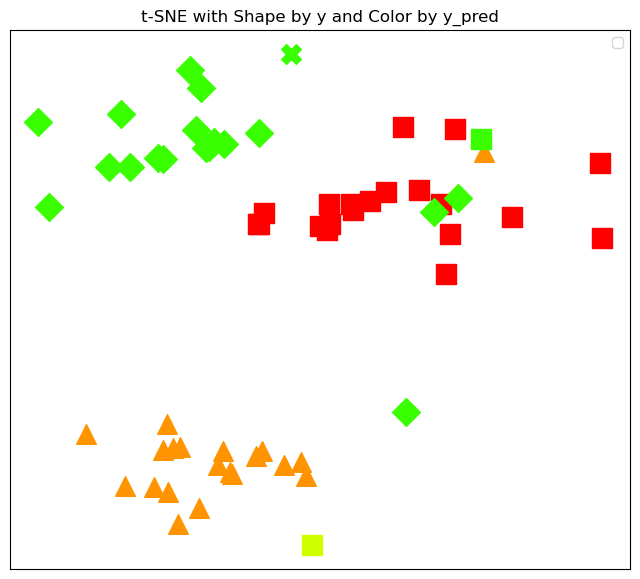

In [113]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap

predicted_np = predicted.cpu().numpy()
y_encoded = label_encoder.fit_transform(y)

markers = ['o', 's', '^', 'P', 'D', 'v', 'h', 'X']
unique_labels = label_encoder.fit_transform(np.unique(y))

fig, ax = plt.subplots(figsize=(8,7))

hsv_modified = cm.get_cmap('hsv', 500)
newcmp = ListedColormap(hsv_modified(np.linspace(0.0, 0.3, 500)))

for xi,yi,mi,ci in zip(X_tsne[:, 0], X_tsne[:, 1] , predicted_np, y_encoded):
    ax.scatter(xi,yi,c=ci, marker=markers[mi], s=200, cmap=newcmp, vmin=min(y_encoded), vmax=max(y_encoded))

ax.set_xticks([])
ax.set_yticks([])

plt.title('t-SNE with Shape by y and Color by y_pred')
plt.legend()
plt.savefig('Figure4b.png', format='png', dpi=300)
plt.show()

In [107]:
unique_labels

array(['Aspergillus_flavus', 'Aspergillus_fumigatus',
       'Aspergillus_fumigatus_test', 'Aspergillus_nomiae'], dtype=object)

<Figure size 640x480 with 0 Axes>

In [120]:
combined = np.column_stack((X_tsne, label_encoder.inverse_transform(predicted.cpu().numpy()), y))

In [121]:
df = pd.DataFrame(combined, columns=['t-SNE 1', 't-SNE 2', 'Pred', 'True'])

In [122]:
df

,t-SNE 1,t-SNE 2,Pred,True
0,-1.088107,2.759892,Aspergillus_flavus,Aspergillus_flavus
1,-1.218429,2.621025,Aspergillus_flavus,Aspergillus_flavus
2,-0.433836,3.950024,Aspergillus_flavus,Aspergillus_flavus
3,-0.470268,2.215795,Aspergillus_flavus,Aspergillus_flavus
4,-0.499411,1.562975,Aspergillus_flavus,Aspergillus_flavus
...,...,...,...,...
56,-2.283543,3.738792,Aspergillus_nomiae,Aspergillus_nomiae
57,-0.408307,2.816818,Aspergillus_nomiae,Aspergillus_nomiae
58,-2.323241,3.65179,Aspergillus_nomiae,Aspergillus_nomiae
59,-2.204745,3.701738,Aspergillus_nomiae,Aspergillus_nomiae


In [123]:
df.to_csv('fig4b_out.csv', index=False)